In [1]:
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

In [2]:
directory = "D:\Code\Python\Machine learning\Pokemon image recognition\PokemonData"
labels = os.listdir(directory)
nb = len(labels)

In [3]:
store = {}
def Get_Input_Label(directory, labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(directory, label)
        for image in os.listdir(folder):
            try:
                img = load_img(os.path.join(folder, image), target_size=(150, 150))
                img = img_to_array(img)
                img = img / 255
                dataset.append((img, count))
            except:
                pass
        print(f'\rCompleted: {label}',end='')
        store[label] = count
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [4]:
image_input, output_label = Get_Input_Label(directory,labels)

Completed: Zubatstuffdslash

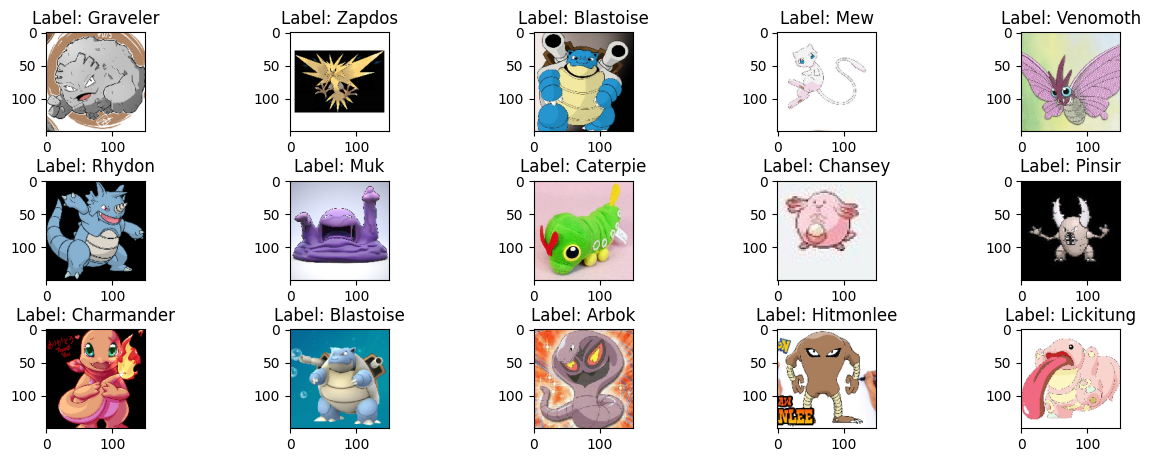

In [5]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(image_input[i])
    plt.title(f'Label: {labels[output_label[i]]}')

In [6]:
training_img, test_img, training_label, test_label = train_test_split(image_input, output_label, train_size=0.8, shuffle=True)

In [7]:
#initializing the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))#Convolutional layer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(nb, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#To train the model
#skip to block that says load to skip this
model.fit(training_img, training_label, epochs=20, validation_data=(test_img, test_label))

In [ ]:
#to test accuracy of model using parts of the dataset
loss, accuracy = model.evaluate(test_img, test_label)
print(f"loss : {loss}")
print(f"accuracy : {accuracy}")

In [ ]:
#to test accuracy of model using all of the dataset
loss, accuracy = model.evaluate(image_input, output_label)
print(f"loss : {loss}")
print(f"accuracy : {accuracy}")

In [39]:
#save trained model
model.save('pokemon_image_classifier.model')

INFO:tensorflow:Assets written to: pokemon_image_classifier.model\assets


INFO:tensorflow:Assets written to: pokemon_image_classifier.model\assets


In [8]:
#loading trained model
model = models.load_model('pokemon_image_classifier.model')

In [ ]:
#my attempt to automize training - doesn't really work
def train_to(model, image_input, output_label, rating):
    accuracy = 0
    while accuracy < rating:
        model = models.load_model('pokemon_image_classifier.model')
        training_img, test_img, training_label, test_label = train_test_split(image_input, output_label, train_size=0.8, shuffle=True)
        model.fit(training_img, training_label, epochs=1, validation_data=(test_img, test_label))
        loss, accuracy = model.evaluate(test_img, test_label)
        print(f"accuracy = {accuracy}")
        model.save('pokemon_image_classifier.model')

In [28]:
#subroutine to test by predicting a random input
def show_test(model):
    model = models.load_model('pokemon_image_classifier.model')
    index = random.randint(0, 214)
    global image_input, output_label
    img = image_input[index]
    label = output_label[index]
    plt.imshow(img)
    predicted = model.predict(np.array([img]))
    index = np.argmax(predicted)
    plt.title(f'Label: {index}')
    plt.imshow(img)
    print(f'Real Label : {label}')

1/1 [==============================] - 0s 52ms/step
Real Label : 54


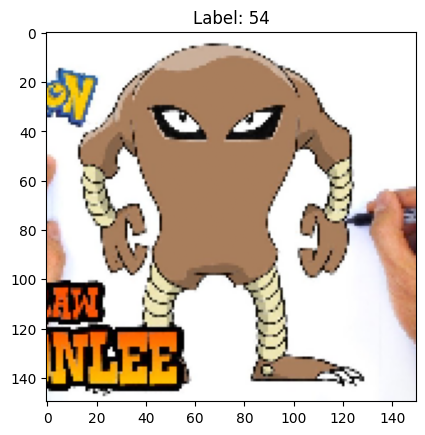

In [38]:
show_test(model)